In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import h5py

#### $\Delta\phi=0$

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[20000.          5000.          2222.22222222  1250.
   800.           555.55555556   408.16326531   312.5
   246.91358025   200.        ]


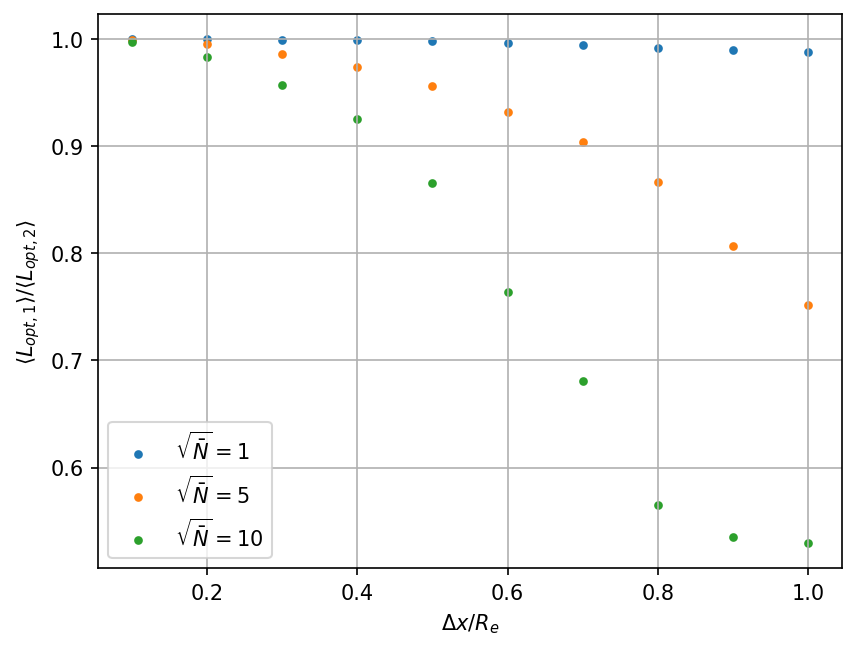

In [12]:
Nbars =[1,5,10]
#Nbars=[50,100,200]
dx=np.loadtxt(f"Nbar10_dphi0_no_sa/dx.csv")
n_target=2*10/dx*10/dx
print(dx)
print(n_target)
n_param=len(dx)

plt.figure(dpi=150)
plt.grid()
plt.xlabel("$\Delta x/R_e$")
plt.ylabel(r"$\langle L_{opt,1}\rangle /\langle L_{opt,2}\rangle$")
for Nbar in Nbars:
    directory_sa=f'Nbar{Nbar}_dphi0_sa'
    directory_no_sa=f'Nbar{Nbar}_dphi0_no_sa'
    #number of different parameters
    opt_sa=np.loadtxt(f"{directory_sa}/opt.csv")
    #number of simulations per parameter
    n_sim=int(len(opt_sa)/n_param)
    opt_no_sa=np.loadtxt(f"{directory_no_sa}/opt.csv")
    #reshape arrays
    opt_sa=opt_sa.reshape(n_param,n_sim).mean(axis=1)
    opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
    #normalize with corresponding values of n_target
    for i in range(n_param):
        opt_sa[i]=opt_sa[i]/n_target[i]
        opt_no_sa[i]=opt_no_sa[i]/n_target[i]
    plt.scatter(dx,opt_sa/opt_no_sa,s=10,label=r"$\sqrt{\bar N}=$"+f"{Nbar}")
plt.legend()
plt.savefig("opt_hom.pdf")

#### Now for checkerboard target density $\Delta\phi=0.25$

In [13]:
Nbars =[10,50,100]
dx=np.loadtxt(f"Nbar10/checkerboard/no_sa/dx.csv")
n_param=len(dx)

plt.figure(dpi=150)
plt.grid()
plt.xlabel("$\Delta L/R_e$")
plt.ylabel(r"$L^{opt}_2/L^{opt}_1$")
for Nbar in Nbars:
    directory=f'Nbar{Nbar}/checkerboard'
    #number of different parameters
    opt_sa_exp=np.loadtxt(f"{directory}/sa_exp/opt.csv")
    #number of simulations per parameter
    n_sim=int(len(opt_sa_exp)/n_param)
    opt_no_sa=np.loadtxt(f"{directory}/no_sa/opt.csv")
    #reshape arrays
    opt_sa_exp=opt_sa_exp.reshape(n_param,n_sim).mean(axis=1)
    opt_no_sa=opt_no_sa.reshape(n_param,n_sim).mean(axis=1)
    plt.scatter(dx,opt_sa_exp/opt_no_sa,s=10,label=r"$\sqrt{\bar N}=$"+f"{Nbar}")
plt.legend()
plt.savefig("opt_checkerboard_dphi0p25.pdf")

print(opt_no_sa)
print(opt_sa_exp)

FileNotFoundError: Nbar10/checkerboard/no_sa/dx.csv not found.

#### Now for checkerboard target density $\Delta\phi=0.5$